# Madrid: Traffic Accident Analysis

Links to the website: https://albacastrillo.github.io/AccidentsMadrid/

### Motivation:
Are you ready to take a deep dive into the world of data analysis and visualisation? We certainly are! As a group of three curious and driven Spanish students, we have taken on an exciting project - analysing and studying a comprehensive dataset containing information on traffic accidents in Madrid.

## Part 0: IMPORTS


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import calplot
import folium
import json
from folium.plugins import HeatMap, HeatMapWithTime
import seaborn as sns
from unidecode import unidecode
from random import random
import re
import unidecode
import json
from unidecode import unidecode
from unidecode import unidecode
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
import pandas as pd

from bokeh.models import ColumnDataSource, LogColorMapper
import colorcet as cc
import chartify

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
import pandas as pd


In [3]:
import warnings
warnings.filterwarnings('ignore')

## Part 1: Gathering the data and clean it

In [4]:
#Gathering
df1  = pd.read_csv("2023_Accidentalidad.csv",delimiter=";")
df2  = pd.read_csv("2022_Accidentalidad.csv",delimiter=";")
df3  = pd.read_csv("2021_Accidentalidad.csv",delimiter=";")
df4  = pd.read_csv("2020_Accidentalidad.csv",delimiter=";")
df5  = pd.read_csv("2019_Accidentalidad.csv",delimiter=";")

In [ ]:
frames = [df1, df2, df3,df4,df5]
result = pd.concat(frames)
result = result.reset_index(drop=True)


In [ ]:
#Cleaning
# we want to have the location of all the accidents in lat/lon not in utm
import utm

def utm_to_latlon(x, y, zone_number=30, zone_letter='T'):
    """Convert UTM coordinates to latitude and longitude."""
    lat, lon = utm.to_latlon(x, y, zone_number, zone_letter)
    return lat, lon

result['coordenada_y_utm'] = result['coordenada_y_utm'].replace('#¡VALOR!', np.nan)
result['coordenada_x_utm'] = result['coordenada_x_utm'].replace('#¡VALOR!', np.nan)
result = result.dropna(subset=['coordenada_y_utm', 'coordenada_x_utm'])

result['coordenada_x_utm'] = result['coordenada_x_utm'].str.replace(',', '.').astype(float)
result['coordenada_y_utm'] = result['coordenada_y_utm'].str.replace(',', '.').astype(float)

result['lat'], result['lon'] = zip(*result.apply(lambda row: utm_to_latlon(row['coordenada_x_utm'], row['coordenada_y_utm']), axis=1))

In [ ]:
# we drop two useless columns 
result = result.drop('Unnamed: 19', axis=1)
result = result.drop('Unnamed: 20', axis=1)


In [24]:
# we add a column day of the week
result['fecha'] = pd.to_datetime(result['fecha'])
result['DayOfWeek'] = result['fecha'].dt.day_name()



In [ ]:
result.to_csv('merged_database.csv', index=False)

result.info()

In [178]:
result= pd.read_csv("merged_database.csv",delimiter=",")

In [238]:
### translation
result['sexo'] = result['sexo'].replace({'Desconocido': 'Unknown', 'Hombre': 'Male', 'Mujer': 'Female'})
result['rango_edad'] = result['rango_edad'].replace({
    'De 10 a 14 años': '10-14 years old',
    'De 15 a 17 años': '15-17 years old',
    'De 18 a 20 años': '18-20 years old',
    'De 21 a 24 años': '21-24 years old',
    'De 25 a 29 años': '25-29 years old',
    'De 30 a 34 años': '30-34 years old',
    'De 35 a 39 años': '35-39 years old',
    'De 40 a 44 años': '40-44 years old',
    'De 45 a 49 años': '45-49 years old',
    'De 50 a 54 años': '50-54 years old',
    'De 55 a 59 años': '55-59 years old',
    'De 6 a 9 años': '6-9 years old',
    'De 60 a 64 años': '60-64 years old',
    'De 65 a 69 años': '65-69 years old',
    'De 70 a 74 años': '70-74 years old',
    'Menor de 5 años': 'Under 5 years old',
    'Más de 74 años': 'Over 74 years old',
    'Desconocido': 'Unknown'
})

result['estado_meteorológico'] = result['estado_meteorológico'].replace({
    'Despejado': 'Clear',
    'Granizando': 'Hailing',
    'LLuvia intensa': 'Heavy rain',
    'Lluvia débil': 'Light rain',
    'Nevando': 'Snowing',
    'Nublado': 'Cloudy',
    'Se desconoce': 'Unknown',

})
translations = {
    'Ambulancia SAMUR': 'Ambulance SAMUR',
    'Autobus EMT': 'EMT Bus',
    'Autobús': 'Bus',
    'Autobús articulado': 'Articulated Bus',
    'Autobús articulado EMT': 'Articulated EMT Bus',
    'Autocaravana': 'Motorhome',
    'Bicicleta': 'Bicycle',
    'Bicicleta EPAC (pedaleo asistido)': 'EPAC Bicycle (Pedal-Assisted)',
    'Camión de bomberos': 'Fire Truck',
    'Camión rígido': 'Rigid Truck',
    'Caravana': 'Caravan',
    'Ciclo': 'Cycle',
    'Ciclo de motor L1e-A': 'L1e-A Motorized Cycle',
    'Ciclomotor': 'Moped',
    'Ciclomotor de dos ruedas L1e-B': 'L1e-B Two-Wheeled Moped',
    'Ciclomotor de tres ruedas': 'Three-Wheeled Moped',
    'Cuadriciclo ligero': 'Light Quadricycle',
    'Cuadriciclo no ligero': 'Non-Light Quadricycle',
    'Furgoneta': 'Van',
    'Maquinaria agrícola': 'Agricultural Machinery',
    'Maquinaria de obras': 'Construction Machinery',
    'Microbús <= 17 plazas': 'Microbus <= 17 seats',
    'Moto de tres ruedas > 125cc': 'Three-Wheeled Motorcycle > 125cc',
    'Moto de tres ruedas hasta 125cc': 'Three-Wheeled Motorcycle up to 125cc',
    'Motocicleta > 125cc': 'Motorcycle > 125cc',
    'Motocicleta hasta 125cc': 'Motorcycle up to 125cc',
    'Otros vehículos con motor': 'Other Motorized Vehicles',
    'Otros vehículos sin motor': 'Other Non-Motorized Vehicles',
    'Patinete': 'Scooter',
    'Patinete no eléctrico': 'Non-Electric Scooter',
    'Remolque': 'Trailer',
    'Semiremolque': 'Semi-Trailer',
    'Sin especificar': 'Not specified',
    'Todo terreno': 'All-Terrain Vehicle',
    'Tractocamión': 'Tractor-Trailer',
    'Tranvía': 'Tram',
    'Tren/metro': 'Train/Metro',
    'Turismo': 'Car',
    'VMU eléctrico': 'Electric VMU',
    'Vehículo articulado': 'Articulated Vehicle'
}
result['tipo_vehiculo'].replace(translations, inplace=True)


# create a dictionary with the translations
translations = {
    'Asistencia sanitaria ambulatoria con posterioridad': 'Outpatient medical care afterwards',
    'Asistencia sanitaria inmediata en centro de salud o mutua': 'Immediate medical care at health center or clinic',
    'Asistencia sanitaria sólo en el lugar del accidente': 'Medical care only at the scene of the accident',
    'Atención en urgencias sin posterior ingreso': 'Emergency care without subsequent admission',
    'Fallecido 24 horas': 'Deceased within 24 hours',
    'Ingreso inferior o igual a 24 horas': 'Admission less than or equal to 24 hours',
    'Ingreso superior a 24 horas': 'Admission greater than 24 hours',
    'Se desconoce': 'Unknown',
    'Sin asistencia sanitaria': 'No medical care',
    np.nan: np.nan
}

# replace the values in the lesividad column using the translations dictionary
result['lesividad'].replace(translations, inplace=True)


## Part 2: analysis

### MADRID BY BIKE

In [119]:
list_of_bikes = ['Bicycle', 'EPAC bicycle (assisted pedaling)', 'Scooter', 'Non-electric scooter']
bike=result[result['tipo_vehiculo'].isin(list_of_bikes)]

### MAP VISUALISATIONS
Where does it happen in the map

### HEAT MAP

In [28]:
#Bike Heatmap with Pins in the Heatpoints
heat=bike[['lat', 'lon']].values.tolist()
madrid_map_bike = folium.Map(location=[40.4168, -3.7038], zoom_start=13)

# Locations with more accidents
data = pd.DataFrame({
   'lon':[-3.692087, -3.693752, -3.707994],
   'lat':[40.408703, 40.419353, 40.421647],
   'name':['Estación del Arte', 'Plaza Cibeles', 'Gran Vía'],
}, dtype=str)

# Markers
for i in range(0,len(data)):
    folium.Marker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup=data.iloc[i]['name'],
        icon=folium.Icon(color='red', prefix='fa',icon='car-burst')
    ).add_to(madrid_map_bike)

#Heatmap layer
HeatMap(heat, radius=8, blur=4, colormap='YlOrRd').add_to(madrid_map_bike)
madrid_map_bike

# Save the map to an HTML file
madrid_map_bike.save('bike_heatmap.html')

# Display the map
madrid_map_bike


In [26]:
heat_df=bike
heat_df['Weight'] = heat_df['fecha'].dt.year
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['lat','lon', 'Weight'])
heat_data = [[[row['lat'],row['lon']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(2019,2024)]


In [27]:

map_hooray = folium.Map([40.4168, -3.7038], zoom_start=13, tiles="OpenStreetMap")

hm = HeatMapWithTime(heat_data, auto_play=False, max_opacity=0.5)

# Add the heatmap layer to the map
hm.add_to(map_hooray)

# Add a title to the map using folium.Html and folium.Popup
title_html = '<h3 align="center" style="font-size:16px"><b>Heatmap of Bike Accidents  with Time in Madrid</b></h3>'
map_hooray.get_root().html.add_child(folium.Element(title_html))

# Add a marker to the map

# Display the map
map_hooray


### Map of districts
The heatMap is not relly clear lets see by districts

In [30]:
bike['distrito'] = bike['distrito'].str.title()
bike['distrito'] = bike['distrito'].apply(lambda x: unidecode(x.lower()))
bike['distrito'] = bike['distrito'].astype(str).str.title()

distrito_p = bike.groupby(bike['distrito']).count()['num_expediente']
dis = list(distrito_p.items())
df_bike = pd.DataFrame(dis, columns=['name', 'accidents'])

In [39]:

def normalize_district_name(name):
    # convert to lowercase
    name = name.lower()
    # remove accents
    name = unidecode.unidecode(name)
    # remove non-word characters and replace spaces with hyphens
    name = re.sub(r'\W+', '-', name)
    # remove trailing hyphens
    name = re.sub(r'-+$', '', name)
    return name

In [40]:
df_bike['district_normalized'] = df_bike['name'].apply(normalize_district_name)

In [78]:

# Load GeoJSON data
with open('madrid-districts_.geojson') as f:
    districts_geojson_data = json.load(f)

bike['distrito'] = bike['distrito'].astype(str).str.title()
bike['distrito'] = bike['distrito'].apply(lambda x: unidecode(x.lower()))
bike['distrito'] = bike['distrito'].astype(str).str.title()


distrito_p = bike.groupby(bike['distrito'].str.title()).count()['num_expediente']
dis = list(distrito_p.items())
df = pd.DataFrame(dis, columns=['name', 'accidents'])

# Create a Folium map centered on Madrid
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=districts_geojson_data,
    name='choropleth',
    data=df,
    columns=['name', 'accidents'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Accidents',
    featureidkey='properties.name',
    highlight=True,
    overlay=True,
    


).add_to(madrid_map)
# Add a tooltip with the district names
for feature in districts_geojson_data['features']:
    name = feature['properties']['name']
    coords = feature['geometry']['coordinates'][0][0]
    center_lat = sum([c[1] for c in coords])/len(coords)
    center_lon = sum([c[0] for c in coords])/len(coords)
    num_accidents = df_bike.loc[df_bike['name'] == name, 'accidents']
    if not num_accidents.empty:
        print(num_accidents)
        tooltip_text = f"{name}: {num_accidents.iloc[0]} bike accidents"
    else:
        tooltip_text = f"{name}: 0 bike accidents"
    folium.Marker(
            location=[center_lat, center_lon],
            icon=folium.Icon(color='green', prefix='fa',icon='bicycle'),
            tooltip=tooltip_text,
        ).add_to(madrid_map)
# Display the map
# Add layer control to toggle choropleth layer
folium.LayerControl().add_to(madrid_map)
madrid_map


3    373
Name: accidents, dtype: int64
0    227
Name: accidents, dtype: int64
13    202
Name: accidents, dtype: int64
14    234
Name: accidents, dtype: int64
4    122
Name: accidents, dtype: int64
16    156
Name: accidents, dtype: int64
5    193
Name: accidents, dtype: int64
7    206
Name: accidents, dtype: int64
10    277
Name: accidents, dtype: int64
9    142
Name: accidents, dtype: int64
2    148
Name: accidents, dtype: int64
17    88
Name: accidents, dtype: int64
12    131
Name: accidents, dtype: int64
11    78
Name: accidents, dtype: int64
6    92
Name: accidents, dtype: int64
8    164
Name: accidents, dtype: int64
20    64
Name: accidents, dtype: int64
19    73
Name: accidents, dtype: int64
18    54
Name: accidents, dtype: int64
15    135
Name: accidents, dtype: int64
1    64
Name: accidents, dtype: int64


### Hour of the accidents
In Spain people usually have dinner in between 20:00 and 21:00 so at this time it is usual to go out to have dinner or some drinks with your friends on a weekend.

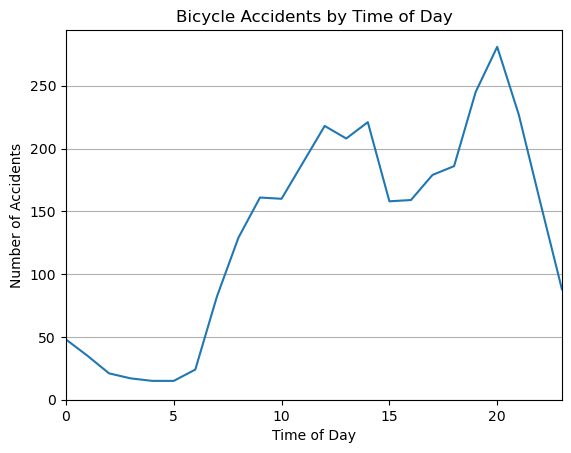

In [79]:
hour_bike=bike.groupby(pd.DatetimeIndex(bike['hora']).hour).count()['num_expediente']

# Create a line chart with Matplotlib
plt.plot(hour_bike)

# Set the x-axis label and limits
plt.xlabel('Time of Day')
plt.xlim(0, 23) # assuming data is in 24-hour format

# Set the y-axis label and limits
plt.ylabel('Number of Accidents')
plt.ylim(0, None)

# Add grid
plt.grid(axis = 'y')

# Add a title to the chart
plt.title('Bicycle Accidents by Time of Day')

# Show the chart
plt.show()

### Distribution by age and gender


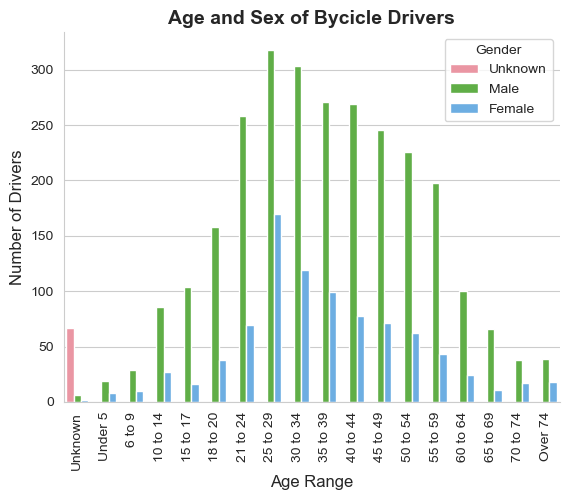

In [115]:

#code done before translating
# Dictionary for legend
gender_names = {'Mujer': 'Female', 'Hombre': 'Male', 'Desconocido': 'Unknown'}

# Set the order
order = ['Desconocido', 'Menor de 5 años', 'De 6 a 9 años', 'De 10 a 14 años', 'De 15 a 17 años', 'De 18 a 20 años', 'De 21 a 24 años', 'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años', 'Más de 74 años' ]
order2 = ['Unknown', 'Under 5', '6 to 9', '10 to 14', '15 to 17', '18 to 20', '21 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', 'Over 74']

# Group by sex and age range
age_bike=bike[['sexo','rango_edad','num_expediente']].groupby(["sexo","rango_edad"]).count()['num_expediente']
age_bike = age_bike.reset_index()

# Rename the columns
age_bike.columns = ['Gender', 'Age Range', 'Number of Drivers']

# Create the bar plot with the specified order and color palette
sns.set_style('whitegrid')
sns.set_palette(['#8B008B', '#4169E1'])
ax = sns.barplot(x='Age Range', y='Number of Drivers', hue='Gender', data=age_bike, order=order)

# Set the title and axis labels
ax.set_title('Age and Sex of Bycicle Drivers', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Number of Drivers', fontsize=12)

# Change x-axis tick labels to English
ax.set_xticklabels(labels=order2, rotation=90, fontsize=10)

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = [gender_names[label] for label in labels]
ax.legend(handles, labels, title='Gender', loc='upper right')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()


# COVID

### calplot
Did the covid had an impact

(<Figure size 1250x850 with 6 Axes>,
 array([<AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>,
        <AxesSubplot:ylabel='2023'>], dtype=object))

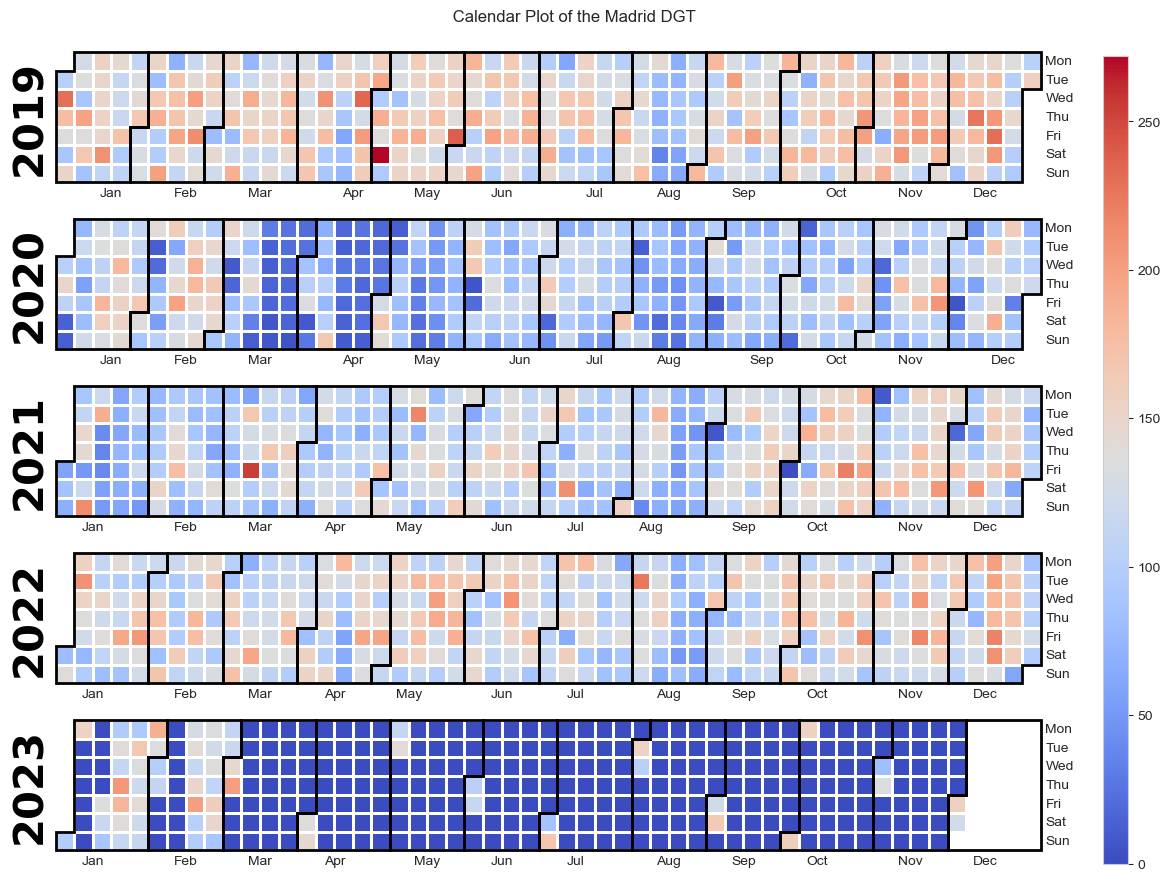

In [102]:
cmap = sns.dark_palette("#69d", as_cmap=True) 
daily_counts = result.groupby(pd.DatetimeIndex(result['fecha'])).count()['num_expediente']

calplot.calplot(daily_counts, yearlabel_kws={'color': 'black'},
                suptitle=" Calendar Plot of the Madrid DGT",
                cmap='coolwarm', linecolor='w', linewidth=2, 
                fillcolor='w', edgecolor='black')


In [125]:
covid= result[pd.to_datetime(result['fecha']).dt.year == 2020]
covid=covid[pd.to_datetime(covid['fecha']).dt.month.isin([3,4])]

Change over tendencys
### Accidents over the week


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

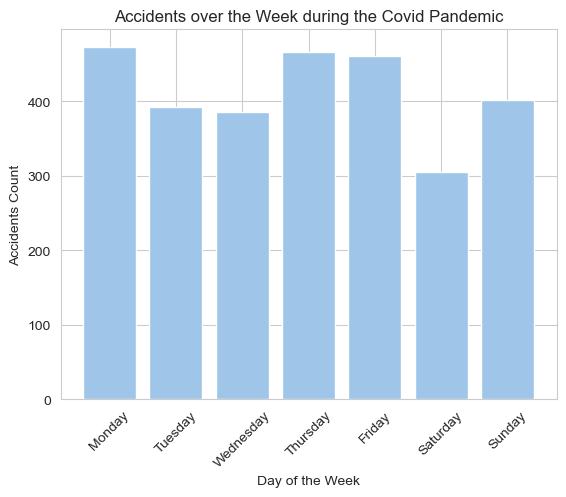

In [126]:
daily_counts = covid.groupby(['DayOfWeek']).count()['num_expediente']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_covid=[]
for i in weekdays:
    daily_covid.append(daily_counts[i])

plt.bar(weekdays, daily_covid, color ='#9fc5e8')
plt.title("Accidents over the Week during the Covid Pandemic")
plt.xlabel('Day of the Week')
plt.ylabel('Accidents Count')

plt.xticks(rotation=45, fontsize=10)

### Accidents during the day

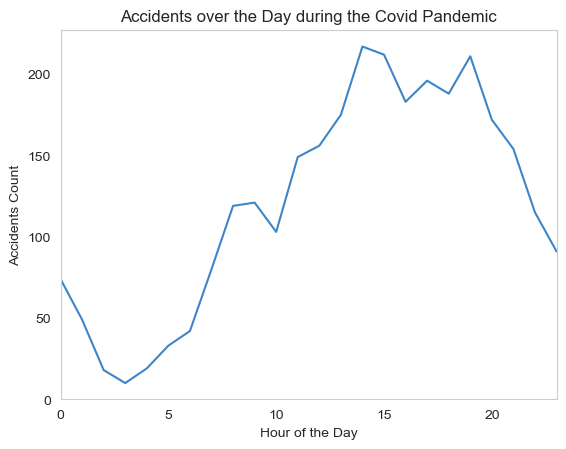

In [100]:
nb_per_cat_per=covid.groupby([pd.DatetimeIndex(covid['hora']).hour]).count()['num_expediente']
plt.plot(nb_per_cat_per, color='#3d85c6')
plt.title("Accidents over the Day during the Covid Pandemic")
plt.xlabel('Hour of the Day')
plt.xlim(0, 23)
plt.ylabel('Accidents Count')
plt.ylim(0, None)
plt.grid()

plt.show()

### Map of districts


In [104]:
covid['distrito'] = covid['distrito'].astype(str).str.title()
covid['distrito'] = covid['distrito'].apply(lambda x: unidecode(x.lower()))
covid['distrito'] = covid['distrito'].astype(str).str.title()


distrito_p = covid.groupby(covid['distrito'].str.title()).count()['num_expediente']
dis = list(distrito_p.items())
df = pd.DataFrame(dis, columns=['name', 'accidents'])

In [109]:
# Apply unidecode to remove accents

# Load GeoJSON data
with open('madrid-districts_.geojson') as f:
    districts_geojson_data = json.load(f)

covid['distrito'] = covid['distrito'].astype(str).str.title()
covid['distrito'] = covid['distrito'].apply(lambda x: unidecode(x.lower()))
covid['distrito'] = covid['distrito'].astype(str).str.title()


distrito_p = covid.groupby(covid['distrito'].str.title()).count()['num_expediente']
dis = list(distrito_p.items())
df = pd.DataFrame(dis, columns=['name', 'accidents'])

# Create a Folium map centered on Madrid
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=districts_geojson_data,
    name='choropleth',
    data=df,
    columns=['name', 'accidents'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Accidents',
    featureidkey='properties.name',
    highlight=True,
    overlay=True,
    


).add_to(madrid_map)
# Add a tooltip with the district names
for feature in districts_geojson_data['features']:
    name = feature['properties']['name']
    coords = feature['geometry']['coordinates'][0][0]
    center_lat = sum([c[1] for c in coords])/len(coords)
    center_lon = sum([c[0] for c in coords])/len(coords)
    num_accidents = df.loc[df['name'] == name, 'accidents']

    if not num_accidents.empty:
        tooltip_text = f"{name}: {num_accidents.iloc[0]} accidents"
    else:
        tooltip_text = f"{name}: 0 accidents"
    folium.Marker(
        location=[center_lat, center_lon],
        icon=folium.Icon(color="red"),
        tooltip=tooltip_text,
    ).add_to(madrid_map)
# Display the map
# Add layer control to toggle choropleth layer
folium.LayerControl().add_to(madrid_map)
madrid_map


### Age and gender

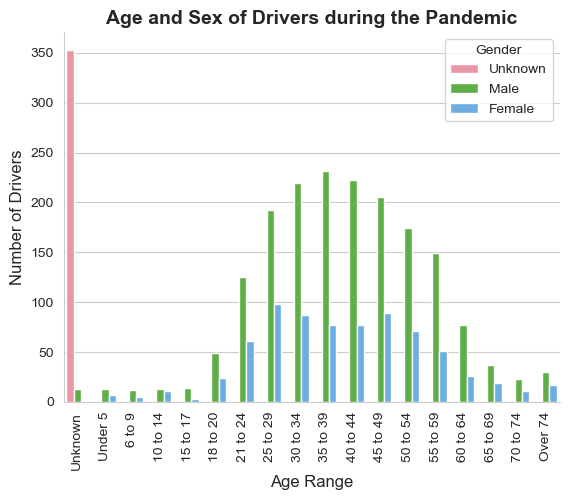

In [128]:

##code before translating
# Dictionary for legend
gender_names = {'Mujer': 'Female', 'Hombre': 'Male', 'Desconocido': 'Unknown'}

# Set the order
order = ['Desconocido', 'Menor de 5 años', 'De 6 a 9 años', 'De 10 a 14 años', 'De 15 a 17 años', 'De 18 a 20 años', 'De 21 a 24 años', 'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años', 'Más de 74 años' ]
order2 = ['Unknown', 'Under 5', '6 to 9', '10 to 14', '15 to 17', '18 to 20', '21 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', 'Over 74']

# Group by sex and age range
age_covid = covid.groupby(["sexo","rango_edad"]).count()['num_expediente'].reset_index()

# Rename the columns
age_covid.columns = ['Gender', 'Age Range', 'Number of Drivers']

# Create the bar plot with the specified order and color palette
sns.set_style('whitegrid')
sns.set_palette(['#8B008B', '#4169E1'])
ax = sns.barplot(x='Age Range', y='Number of Drivers', hue='Gender', data=age_covid, order=order)

# Set the title and axis labels
ax.set_title('Age and Sex of Drivers during the Pandemic', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Number of Drivers', fontsize=12)

# Change x-axis tick labels to English
ax.set_xticklabels(labels=order2, rotation=90, fontsize=10)

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = [gender_names[label] for label in labels]
ax.legend(handles, labels, title='Gender', loc='upper right')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()


In [129]:
heat=covid[['lat', 'lon']].values.tolist()
madrid_map_covid = folium.Map(location=[40.427, -3.7038], zoom_start=13, width='100%', height='100%')

# Locations with more accidents
data = pd.DataFrame({
   'lon':[-3.711989, -3.669207, -3.690837, -3.673309, -3.702507, -3.690187, -3.702906],
   'lat':[40.446572, 40.398267, 40.437978, 40.433304, 40.479809, 40.458380, 40.453981],
   'name':['Guzmán el Bueno', 'Puente de Vallecas', 'Gregorio Marañón', 'Diego de León', 'Avenida Momforte de Lemos', 'Cuzco', 'Bravo Murillo'],
}, dtype=str)

# add marker one by one on the map
for i in range(0,len(data)):
    folium.Marker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup=data.iloc[i]['name'],
        icon=folium.Icon(color='red', prefix='fa',icon='car-burst')
    ).add_to(madrid_map_covid)

# add heatmap layer
HeatMap(heat, radius=8, blur=4, colormap='YlOrRd').add_to(madrid_map_covid)

# Save the map to an HTML file
madrid_map_covid.save('covid_heatmap.html')

# Display
madrid_map_covid


# WHEATHER
Correlation between wheather and accidents

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

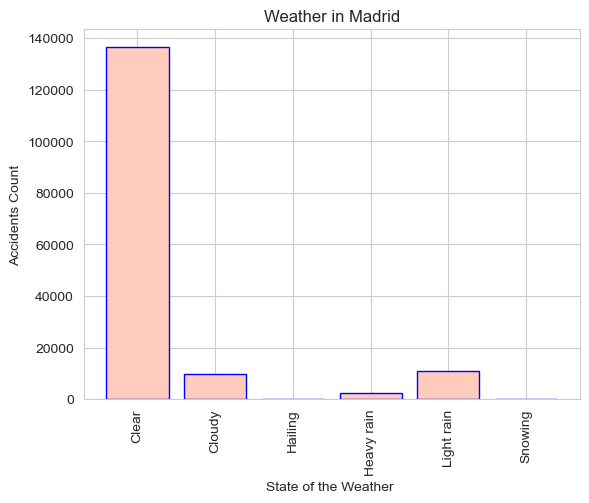

In [275]:
weather=result
weather.dropna(axis=0, subset=['cod_lesividad','lesividad'])
weather = weather.drop(weather[weather['estado_meteorológico'] == 'Unknown'].index)

counts=weather.groupby(['estado_meteorológico']).count()['num_expediente']

plt.bar( counts.index.values, counts,color = (255/255, 204/255, 187/255),edgecolor='blue')
plt.title("Weather in Madrid")
plt.xlabel('State of the Weather ')
plt.ylabel('Accidents Count')
counts = counts.reset_index()

plt.xticks(rotation=90, fontsize=10)


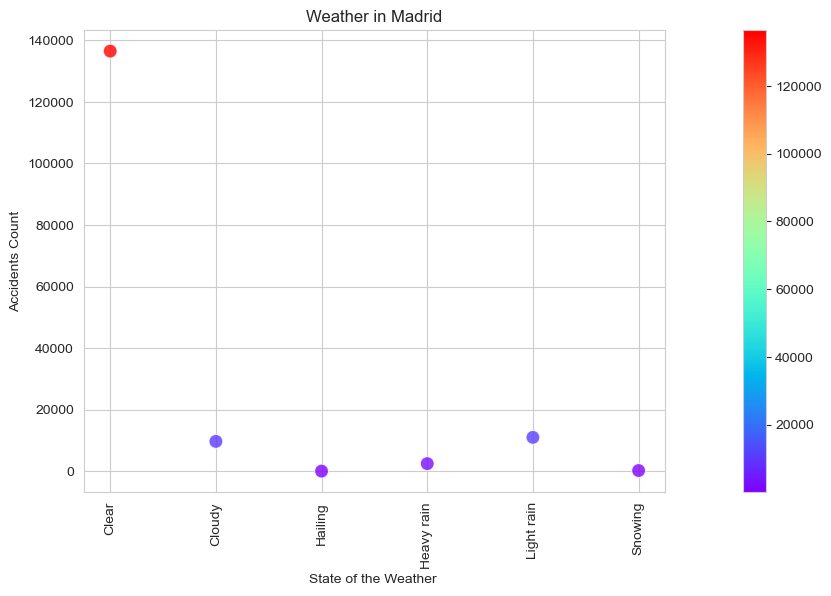

In [145]:
# Create a grouped dataframe by the state of the weather
counts = weather.groupby(['estado_meteorológico']).count()['num_expediente'].reset_index()

# Set the style
sns.set_style("whitegrid")

# Set the plot size
plt.figure(figsize=(10,6))

# Set labels to English
labels = {
    'Despejado': 'Clear',
    'Lluvia débil': 'Light rain',
    'Nublado': 'Cloudy',
    'LLuvia intensa': 'Heavy rain',
    'Granizando': 'Hail',
    'Nevando': 'Snow',
    'Se desconoce': 'Unknown'  
} 

# Create a scatter plot with gradient colors and different markers
g = sns.scatterplot(x="estado_meteorológico", y="num_expediente", data=counts, s=100,
                    hue="num_expediente", palette="rainbow", legend=False, alpha=0.8,
                    sizes=(50, 500), size_norm=(0, 500))

# Set the title and axis labels
plt.title("Weather in Madrid")
plt.xlabel('State of the Weather ')
plt.ylabel('Accidents Count')

# Rotate the x-axis labels to 90 degrees and set the English labels
plt.xticks(rotation=90)

# Add a color bar
sm = plt.cm.ScalarMappable(cmap="rainbow", norm=plt.Normalize(vmin=counts['num_expediente'].min(), vmax=counts['num_expediente'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.1)
#cbar.ax.set_ylabel('Accidents Count', labelpad=10)

# Show the plot
plt.show()


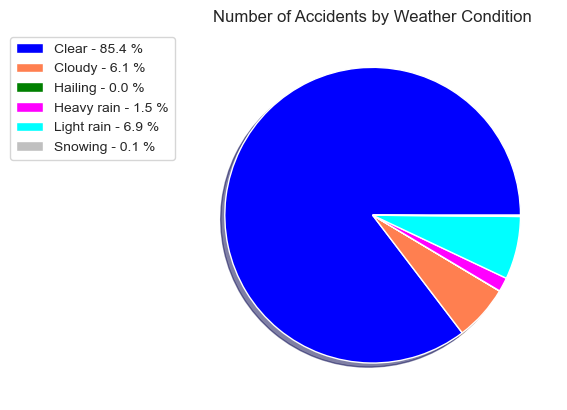

In [142]:
#create a pie plot of the various weather conditions and the number of accidents
x = counts["num_expediente"]
colors = ["b", "coral", "g", "magenta", "cyan", "silver", "purple", "yellow"]
explode = [0,0,0,0,0,0]
plt.pie(x, startangle = 0, shadow = True, colors = colors, explode = explode)
y = counts["estado_meteorológico"]
percent = 100*x/x.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(y, percent)]


plt.legend(labels = labels, loc = "upper left", bbox_to_anchor=(-.5,1))
plt.title("Number of Accidents by Weather Condition")
plt.show()

When it is sunny there are a lot more accidents. This means that a sunny day is worst than a rainy day???

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Admission greater than 24 hours'),
  Text(1, 0, 'Admission less than or equal to 24 hours'),
  Text(2, 0, 'Deceased within 24 hours'),
  Text(3, 0, 'Emergency care without subsequent admission'),
  Text(4, 0, 'Immediate medical care at health center or clinic'),
  Text(5, 0, 'Medical care only at the scene of the accident'),
  Text(6, 0, 'No medical care'),
  Text(7, 0, 'Outpatient medical care afterwards'),
  Text(8, 0, 'Unknown')])

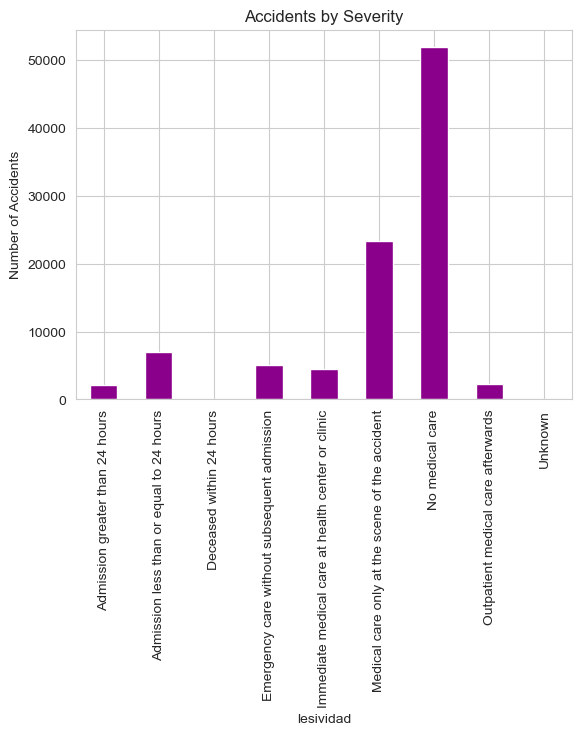

In [176]:
#bar graph by severity
lesividad=weather.groupby(["lesividad"]).count()["num_expediente"]
lesividad.plot(kind = "bar")
plt.ylabel("Number of Accidents")
plt.xticks(rotation = 0)
plt.title("Accidents by Severity")
plt.xticks(rotation=90, fontsize=10)


In [277]:
weather["Severity"]=weather["lesividad"].map({'Outpatient medical care afterwards':5,
 'Immediate medical care at health center or clinic':4,
 'Medical care only at the scene of the accident':2,
 'Emergency care without subsequent admission':3,
 'Deceased within 24 hours':8,
 'Admission less than or equal to 24 hours':6,
 'Admission greater than 24 hours':7,
 'Unknown':0,
 'No medical care':1
    
}
)

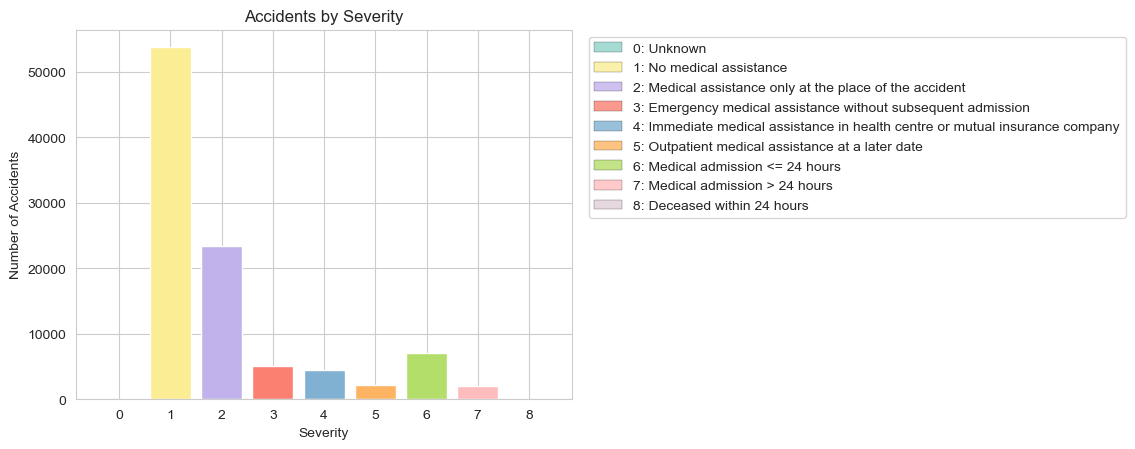

In [278]:

# Group accidents by severity level
weather_gb = weather.groupby(["Severity"]).count()["num_expediente"]

# Define severity labels
severity_labels = {0:'Unknown', 1:'No medical assistance', 
                   2:'Medical assistance only at the place of the accident', 
                   3:'Emergency medical assistance without subsequent admission', 
                   4:'Immediate medical assistance in health centre or mutual insurance company',
                   5:'Outpatient medical assistance at a later date',
                   6:'Medical admission <= 24 hours',
                   7:'Medical admission > 24 hours',
                   8:'Deceased within 24 hours'}                 

# Generate list of colors using seaborn color palette
colors = ['#8dd3c7','#fbed94','#c2b2eb','#fb8072','#80b1d3','#fdb462','#b3de69','#ffbcbc','#e0cfd6']

# Create bar plot with custom colors
plt.bar(x=weather_gb.index, height=weather_gb, color=colors)

# Add x-axis tick labels
plt.xticks(ticks=weather_gb.index, labels=[f"{int(i)}" for i in weather_gb.index])

# Add legend explaining severity levels
handles = [plt.Rectangle((0,0),1,1, color=colors[i], ec="k", lw=0.2, alpha=0.8) for i in range(len(weather_gb))]
legend_labels = [f"{int(i)}: {severity_labels[i]}" for i in weather_gb.index]
plt.legend(handles, legend_labels, loc="upper left", bbox_to_anchor=(1.02, 1.0))

plt.ylabel("Number of Accidents")
plt.xlabel("Severity")
plt.title("Accidents by Severity")

plt.show()


In [ ]:
### with a bokesh


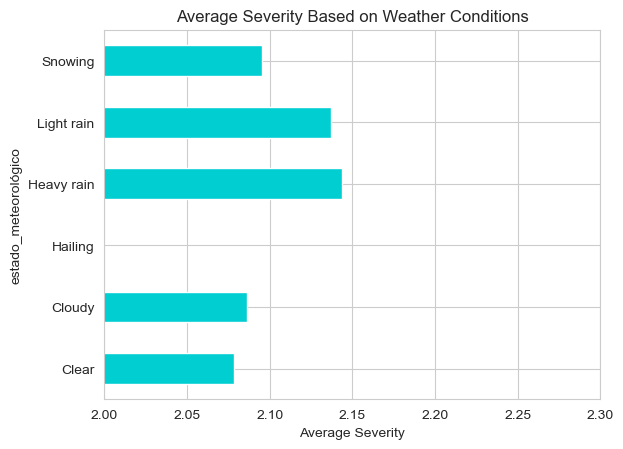

In [279]:
#evaluating how weather condtions effect severity 
weather_gb2 = weather.groupby(["estado_meteorológico"]).mean()["Severity"]
#plot the average severity by weather condtion
weather_gb2.plot(kind = "barh", color = "darkturquoise")
plt.xlabel("Average Severity")
plt.title("Average Severity Based on Weather Conditions")
plt.xlim((2, 2.3))
plt.show()

In [280]:
#number of accidents and severity by weather condtion
weather_gb4 = weather.groupby(["estado_meteorológico","lesividad"]).count()['num_expediente']
weather_gb4 = weather_gb4.reset_index()
weather_gb4.head(10)

estado_meteorológico                                          lesividad  \
0                Clear                    Admission greater than 24 hours   
1                Clear           Admission less than or equal to 24 hours   
2                Clear                           Deceased within 24 hours   
3                Clear        Emergency care without subsequent admission   
4                Clear  Immediate medical care at health center or clinic   
5                Clear     Medical care only at the scene of the accident   
6                Clear                                    No medical care   
7                Clear                 Outpatient medical care afterwards   
8                Clear                                            Unknown   
9               Cloudy                    Admission greater than 24 hours   

   num_expediente  
0            1751  
1            5991  
2             101  
3            4253  
4            3787  
5           19903  
6           44453  
7            1913  
8               7  
9             159

In [281]:
#moves severity to columns in order to be able to plot easier
pivot2_df = weather_gb4.pivot(index = "estado_meteorológico", columns ="lesividad", values = "num_expediente")
pivot2_df = pivot2_df.fillna(0)
pivot2_df

lesividad             Admission greater than 24 hours  \
estado_meteorológico                                    
Clear                                          1751.0   
Cloudy                                          159.0   
Hailing                                           0.0   
Heavy rain                                       33.0   
Light rain                                      119.0   
Snowing                                           1.0   

lesividad             Admission less than or equal to 24 hours  \
estado_meteorológico                                             
Clear                                                   5991.0   
Cloudy                                                   377.0   
Hailing                                                    0.0   
Heavy rain                                               127.0   
Light rain                                               501.0   
Snowing                                                    5.0   

lesividad             Deceased within 24 hours  \
estado_meteorológico                             
Clear                                    101.0   
Cloudy                                    13.0   
Hailing                                    0.0   
Heavy rain                                 2.0   
Light rain                                 5.0   
Snowing                                    0.0   

lesividad             Emergency care without subsequent admission  \
estado_meteorológico                                                
Clear                                                      4253.0   
Cloudy                                                      317.0   
Hailing                                                       0.0   
Heavy rain                                                   91.0   
Light rain                                                  404.0   
Snowing                                                       7.0   

lesividad             Immediate medical care at health center or clinic  \
estado_meteorológico                                                      
Clear                                                            3787.0   
Cloudy                                                            258.0   
Hailing                                                             0.0   
Heavy rain                                                         82.0   
Light rain                                                        370.0   
Snowing                                                             4.0   

lesividad             Medical care only at the scene of the accident  \
estado_meteorológico                                                   
Clear                                                        19903.0   
Cloudy                                                        1372.0   
Hailing                                                          8.0   
Heavy rain                                                     357.0   
Light rain                                                    1719.0   
Snowing                                                         27.0   

lesividad             No medical care  Outpatient medical care afterwards  \
estado_meteorológico                                                        
Clear                         44453.0                              1913.0   
Cloudy                         3127.0                               138.0   
Hailing                          13.0                                 1.0   
Heavy rain                      827.0                                37.0   
Light rain                     3343.0                               159.0   
Snowing                          38.0                                 2.0   

lesividad             Unknown  
estado_meteorológico           
Clear                     7.0  
Cloudy                    1.0  
Hailing                   0.0  
Heavy rain                0.0  
Light rain                0.0  
Snowing                   0.0

In [297]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show

# Define colors for each severity category
severity_types = pivot2_df.columns.tolist()[1:]
severity_colors = ['#8dd3c7','#fbed94','#c2b2eb','#fb8072','#80b1d3','#fdb462','#b3de69','#ffbcbc']

# Create a ColumnDataSource
source = ColumnDataSource(pivot2_df)

# Create a figure with a categorical x-axis
p = figure(x_range=pivot2_df.index.tolist(), height=500, width=800, title="Severity by Weather Condition",
           toolbar_location=None, tools="")

# Create stacked bars for each severity type
p.vbar_stack(severity_types, x='estado_meteorológico', width=0.9, source=source, color=severity_colors, legend_label=severity_types)

# Add a hover tool to show the count for each segment
hover = HoverTool(tooltips=[("Severity", "$name"), ("Count", "@$name{int}")])
p.add_tools(hover)

# Set the axis labels and title
p.xaxis.axis_label = "Weather Condition"
p.yaxis.axis_label = "Count"
p.title.align = 'center'

# Set the legend outside the plot
p.legend.location = "top_right"
p.legend.orientation = "vertical"
p.legend.click_policy = "hide"
p.xaxis.axis_label_text_font_size = '12pt'
p.yaxis.axis_label_text_font_size = '12pt'
p.title.text_font_size = '15pt'  # Increase


#p.add_layout(p.legend[0], 'left')
# Show the plot
show(p)


In [290]:
severity_colors

Field(field='estado_meteorológico', transform=CategoricalColorMapper(id='p18463', ...), units=Unspecified)

Text(0.5, 1.0, 'Severity by Weather Condition')

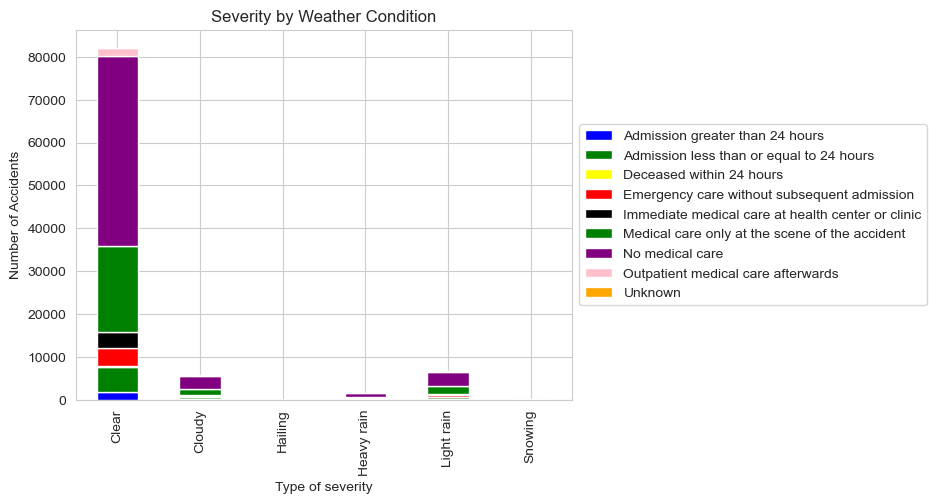

In [165]:
weather_gb5 = weather.groupby(["estado_meteorológico","lesividad"]).count()['num_expediente']


#creates a stacked bar graph based on number of accidents, severity, and weather conditions
colors = ["b", "g", "yellow", "red",'black','green','purple','pink','orange']
pivot2_df.plot.bar(stacked = True, color = colors)
plt.ylabel("Number of Accidents")
plt.xlabel("Type of severity")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))


plt.title("Severity by Weather Condition")

## Bokesh Weather

In [166]:
weather['Year']=pd.DatetimeIndex(weather['fecha']).year

In [168]:
nb_per_cat = weather.groupby(['estado_meteorológico']).count()['num_expediente']
nb_per_cat_per_year = weather.groupby(['estado_meteorológico','Year']).count()['num_expediente']


In [170]:
years = set(weather['Year'])
df1 = pd.DataFrame()
df1['Year'] = weather['Year']
df1.drop_duplicates(inplace=True)
df1.sort_values(by='Year')

for clima in set(weather['estado_meteorológico']):
    tmp = []
    for y in years:
        if (clima, y) in nb_per_cat_per_year:
            tmp.append(nb_per_cat_per_year[clima, y] / nb_per_cat[clima])
        else:
            tmp.append(np.nan)
    df1[clima] = tmp
df1

Year    Cloudy  Light rain  Heavy rain   Snowing     Clear   Hailing
0       2023  0.191875    0.315215    0.265124  0.009174  0.292903  0.368421
7793    2022  0.202598    0.175423    0.128705  0.009174  0.179521  0.263158
54836   2021  0.218785    0.189875    0.252538  0.954128  0.233582  0.210526
96607   2020  0.347355    0.290220    0.344702  0.027523  0.249009  0.157895
129032  2019  0.039386    0.029267    0.008932       NaN  0.044985       NaN

In [174]:
source = ColumnDataSource(df1)

colors = ['#FF5733', '#FA8072', '#FFC300', '#32CD32', '#00BFFF', '#6A5ACD', '#BA55D3', '#FF1493', '#8B0000', '#8FBC8F', '#00CED1', '#FFD700', '#DC143C', '#4169E1']

# Set the legend labels to English
legend_labels = {
    'Despejado': 'Clear',
    'Lluvia débil': 'Light rain',
    'Nublado': 'Cloudy',
    'LLuvia intensa': 'Heavy rain',
    'Granizando': 'Hail',
    'Nevando': 'Snow',
    'Se desconoce': 'Unknown'  
}    

p = figure(
    width=600, height=400,
    title='Yearly Accidents in Madrid by Weather Conditions',
    x_axis_label='Years',
    y_axis_label='Percentage of Accidents'
)

# Create a vbar glyph for each focus crime and add it to the plot
for indx, i in enumerate(set(weather['estado_meteorológico'])):
    p.vbar(
        x='Year', top=i, source=source,
        legend_label=i, color=colors[indx],
        width=0.8, alpha=0.8,
        hover_fill_alpha=1.0, hover_fill_color=colors[indx],
        visible=False
    )

# Configure the legend
p.legend.location = "top_right"
p.legend.click_policy="hide"


# Set the font size of the axis labels and legend
p.title.text_font_size = '13pt'
p.xaxis.axis_label_text_font_size = '10.5pt'
p.yaxis.axis_label_text_font_size = '10.5pt'

output_file("bokeh_weather1_A.html")

show(p)


### seasons

In [226]:
seasons=result

In [227]:
def get_season(date):
    winter_months = [12, 1, 2]
    spring_months = [3, 4, 5]
    summer_months = [6, 7, 8]
    fall_months = [9, 10, 11]

    month = date.month
    if month in winter_months:
        return "winter"
    elif month in spring_months:
        return "spring"
    elif month in summer_months:
        return "summer"
    elif month in fall_months:
        return "fall"


# Apply the get_season function to each date and create a new column called "season"
seasons['season'] = seasons['fecha'].apply(get_season)

In [228]:
seasons_count=seasons.groupby(["season"]).count()["num_expediente"]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'fall'),
  Text(1, 0, 'spring'),
  Text(2, 0, 'summer'),
  Text(3, 0, 'winter')])

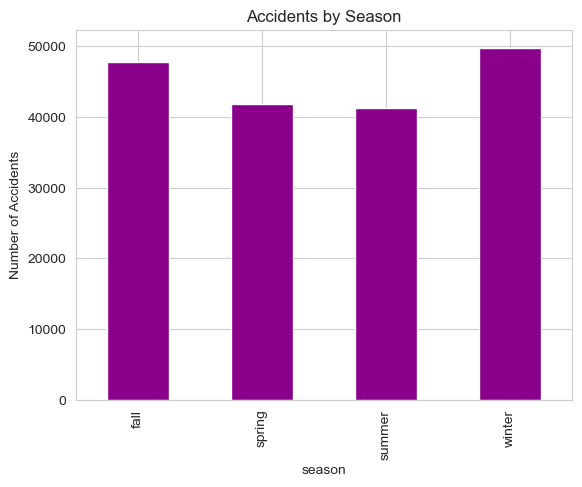

In [229]:
#bar graph by severity
seasons_count.plot(kind = "bar")
plt.ylabel("Number of Accidents")
plt.xticks(rotation = 0)
plt.title("Accidents by Season")
plt.xticks(rotation=90, fontsize=10)


## Drivers
the drivers involved in traffic accidents in Madrid from 2019 to 2023.

### Drivers by age and gender

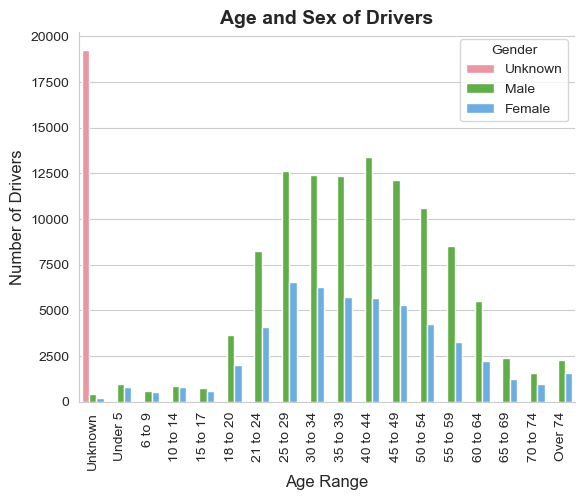

In [179]:
# Dictionary for legend
gender_names = {'Mujer': 'Female', 'Hombre': 'Male', 'Desconocido': 'Unknown'}

# Set the order
order = ['Desconocido', 'Menor de 5 años', 'De 6 a 9 años', 'De 10 a 14 años', 'De 15 a 17 años', 'De 18 a 20 años', 'De 21 a 24 años', 'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años', 'Más de 74 años' ]
order2 = ['Unknown', 'Under 5', '6 to 9', '10 to 14', '15 to 17', '18 to 20', '21 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74', 'Over 74']

# Group by sex and age range
age_drivers=result[['sexo','rango_edad','num_expediente']].groupby(["sexo","rango_edad"]).count()['num_expediente']
age_drivers = age_drivers.reset_index()

# Rename the columns
age_drivers.columns = ['Gender', 'Age Range', 'Number of Drivers']

# Create the bar plot with the specified order and color palette
sns.set_style('whitegrid')
sns.set_palette(['#8B008B', '#4169E1'])
ax = sns.barplot(x='Age Range', y='Number of Drivers', hue='Gender', data=age_drivers, order=order)

# Set the title and axis labels
ax.set_title('Age and Sex of Drivers', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Range', fontsize=12)
ax.set_ylabel('Number of Drivers', fontsize=12)

# Change x-axis tick labels to English
ax.set_xticklabels(labels=order2, rotation=90, fontsize=10)

# Update the legend labels
handles, labels = ax.get_legend_handles_labels()
labels = [gender_names[label] for label in labels]
ax.legend(handles, labels, title='Gender', loc='upper right')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()



### Polar Bar Chart of group that has more accidents
better representation than bar chart

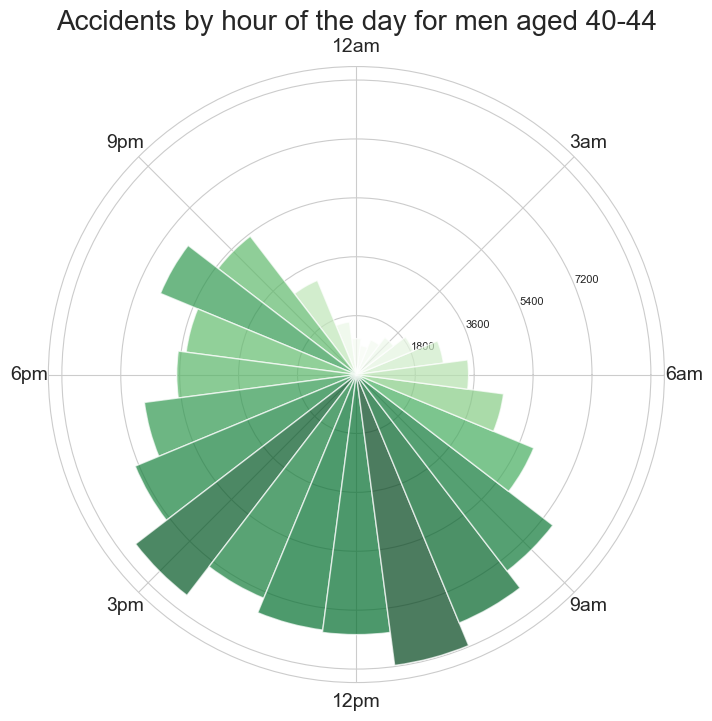

In [181]:
#Polar Bar Chart of the group that has most accidents and the distribution by hours of the day

data_drivers = result[(result['rango_edad']=='De 40 a 44 años') & (result['sexo']=='Hombre')]
data_drivers['hour'] = pd.to_datetime(data_drivers['hora']).dt.hour

counts = data_drivers.groupby('hour').size()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

theta = [(i+1)*2.0*np.pi/24.0 for i in range(24)]

norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.Greens(norm(counts))

bars = ax.bar(theta, counts, width=2.0*np.pi/24.0, bottom=0.0, alpha=0.7, color=colors)

ax.set_title('Accidents by hour of the day for men aged 40-44', fontsize=20)
ax.set_xticklabels(['6am', '3am', '12am', '9pm', '6pm', '3pm', '12pm', '9am'], fontsize=14)
ax.set_yticklabels(range(1800,9000,1800),fontsize=8)

# Show the plot
plt.show()

### Drugs and alcohol

In [184]:
df = result

In [185]:
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Create a new column 'time_of_day' based on the 'hora' column


In [186]:
df['positiva_droga'].fillna(0, inplace=True)
df['positiva_droga'].fillna(0, inplace=True)

In [187]:
drivers_df = df

drivers_df = drivers_df[drivers_df['tipo_persona'] == 'Conductor']
# Extract the lower and upper bounds of the age ranges
drivers_df['time_of_day'] = drivers_df['hora'].apply(lambda x: get_time_of_day(int(x.split(':')[0])))

drivers_map_lower={'De 10 a 14 años':10,
 'De 15 a 17 años':15,
 'De 18 a 20 años':18,
 'De 21 a 24 años':21,
 'De 25 a 29 años':25,
 'De 30 a 34 años':30,
 'De 35 a 39 años':35,
 'De 40 a 44 años':40,
 'De 45 a 49 años':45,
 'De 50 a 54 años':50,
 'De 55 a 59 años':55,
 'De 6 a 9 años':6,
 'De 60 a 64 años':60,
 'De 65 a 69 años':65,
 'De 70 a 74 años':70,
 'Desconocido':30,
 'Menor de 5 años':0,
 'Más de 74 años':75}

drivers_map={'De 10 a 14 años':14,
 'De 15 a 17 años':17,
 'De 18 a 20 años':20,
 'De 21 a 24 años':24,
 'De 25 a 29 años':29,
 'De 30 a 34 años':34,
 'De 35 a 39 años':39,
 'De 40 a 44 años':44,
 'De 45 a 49 años':49,
 'De 50 a 54 años':54,
 'De 55 a 59 años':59,
 'De 6 a 9 años':9,
 'De 60 a 64 años':64,
 'De 65 a 69 años':69,
 'De 70 a 74 años':74,
 'Desconocido':30,
 'Menor de 5 años':5,
 'Más de 74 años':85}
drivers_df['age_lower'] = drivers_df['rango_edad'].map(drivers_map_lower)
drivers_df['age_upper'] = drivers_df['rango_edad'].map(drivers_map)

alcohol_map = {'S': 1, 'N': 0}
drivers_df['alcohol'] = drivers_df['positiva_alcohol'].map(alcohol_map)
# Calculate the mean age for each hour of the day
# Calculate the proportion of drivers who tested positive for alcohol during each hour of the day
drivers_df = drivers_df


### Histogram of age of drivers

In [188]:
# Create a ColumnDataSource object
source = ColumnDataSource(drivers_df)

# Define the bins for the histogram
bins = range(0, 101, 5)

# Create a figure object with the desired options
p = figure(title="Histogram of Age", x_axis_label='Age', y_axis_label='Frequency', tools="hover,pan,wheel_zoom,box_zoom,reset",
           tooltips=[("Count", "@counts"),("Age","@{left}-@{right}")])

# Add the histogram glyph to the figure
p.quad(top='counts', bottom=0, left='left', right='right', source=source, fill_color="navy", line_color="white", alpha=0.5,
       hover_fill_color='firebrick', hover_alpha=1.0, hover_line_color='white')

# Create the histogram for age_upper and age_lower columns
hist, edges = np.histogram(drivers_df[['age_upper', 'age_lower']].values, bins=bins)

# Add the histogram data to the ColumnDataSource
source.data = {'left': edges[:-1], 'right': edges[1:], 'counts': hist}

# Display the plot
show(p)


# Save
output_file("bokeh_hist_age.html")


### Proportion of positive test by age range

In [189]:
# Create a new column that indicates whether alcohol or drugs were positive
drivers_df['positive'] = ''
drivers_df.loc[(drivers_df['alcohol'] == 1) | (drivers_df['positiva_droga'] == 1), 'positive'] = 'yes'

# Group the data by age range and time of day
groups = drivers_df.groupby(['age_lower', 'age_upper', 'time_of_day'])

# Count the number of accidents in each group
counts = groups['positive'].count().reset_index()

In [191]:
proportions = drivers_df.groupby(['age_lower', 'age_upper'])[['alcohol', 'positiva_droga']].apply(lambda x: x.eq(1).sum() / x.count()).reset_index()
proportions['proportion_positive'] = proportions['alcohol'] + proportions['positiva_droga']


Text(0.5, 1.0, 'Proportion of Positive Tests by Age Range')

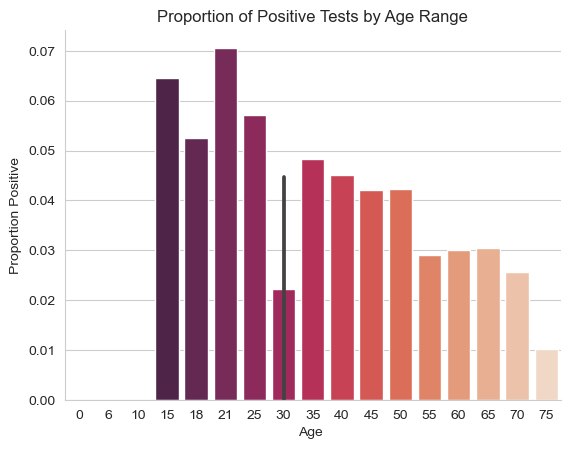

In [192]:
# Create the bar plot showing the proportion of positive tests
sns.barplot(data=proportions, x='age_lower', y='proportion_positive', palette='rocket')

# Set the axis labels and plot title
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('Age ')
plt.ylabel('Proportion Positive')
plt.title('Proportion of Positive Tests by Age Range')

### Correlation of time of day and positive in drugs/alcohol

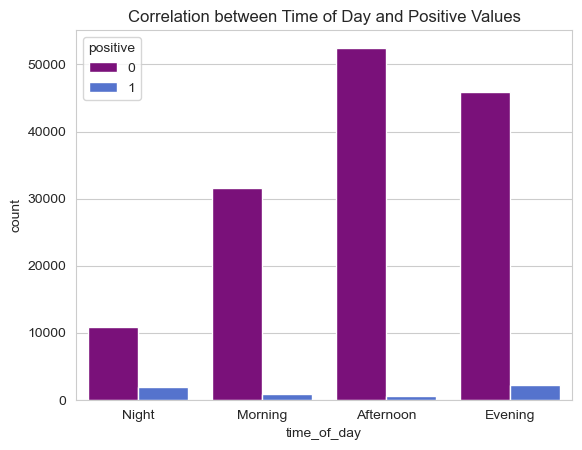

In [193]:
drivers_df['positive'] = 0
drivers_df.loc[(drivers_df['alcohol'] == 1) | (drivers_df['positiva_droga'] == 1), 'positive'] = 1
time_p=drivers_df.groupby("time_of_day")

# Create a count plot
sns.countplot(x="time_of_day", hue="positive", data=drivers_df)

# Set plot title
plt.title("Correlation between Time of Day and Positive Values")

# Show the plot
plt.show()

lets see with a bokesh

In [224]:
# Define the categories for the x-axis and the number of categories
x_categories = [ 'Morning', 'Afternoon', 'Evening','Night']
num_categories = len(x_categories)

# Create arrays for the positive and negative counts
positive_counts = np.zeros(num_categories)
negative_counts = np.zeros(num_categories)

# Loop through the dataframe and count the positive and negative values for each time of day category
for i, category in enumerate(x_categories):
    positive_counts[i] = len(drivers_df[(drivers_df['time_of_day'] == category) & (drivers_df['positive'] == 1)])
    negative_counts[i] = len(drivers_df[(drivers_df['time_of_day'] == category) & (drivers_df['positive'] == 0)])

# Create a ColumnDataSource object from the data
source = ColumnDataSource(data=dict(x_categories=x_categories,
                                    positive_counts=positive_counts,
                                    negative_counts=negative_counts))

# Create the figure
p = figure(x_range=x_categories, height=400,y_axis_label='Frequency',x_axis_label='Time of the day', title="Correlation between Time of Day and Positive Values",
           toolbar_location=None, tools="")

# Add the vertical bars
p.vbar(x='x_categories', top='positive_counts', width=0.9, source=source, color="#FFC107", legend_label="Positive")
p.vbar(x='x_categories', top='negative_counts', width=0.9, source=source, color="#007BFF", legend_label="Negative", bottom='positive_counts')

# Add the hover tool
hover = HoverTool(tooltips=[("Positive Drug/alohol Counts", "@positive_counts"), ("Negative Counts", "@negative_counts")])
p.add_tools(hover)

# Set the legend location and orientation
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.click_policy = 'hide'
# Set the font size of the axis labels and legend
p.xaxis.axis_label_text_font_size = '16pt'
p.yaxis.axis_label_text_font_size = '16pt'
p.add_layout(p.legend[0], 'left')


# Save
output_file("bokeh_correlation_timeofday_positive.html")

show(p)

## where does it happen
maybe in night clubs?

In [195]:
# Positive drivers in alcohol and drugs
pos= drivers_df[drivers_df['positive']==1]
heat=pos[['lat', 'lon']].values.tolist()
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=13)

HeatMap(heat, radius=8, blur=4, colormap='YlOrRd').add_to(madrid_map)

folium.Marker([40.4141, -3.7051], popup='Kapital').add_to(madrid_map)
folium.Marker([40.4293, -3.6999], popup='Teatro Barceló').add_to(madrid_map)
folium.Marker([40.4146, -3.7064], popup='Joy Eslava').add_to(madrid_map)
folium.Marker([40.4324, -3.6887], popup='Opium Madrid').add_to(madrid_map)
folium.Marker([40.4269, -3.6783], popup='Goya Social Club').add_to(madrid_map)
folium.Marker([40.4259, -3.7039], popup='Mitty Cats').add_to(madrid_map)
folium.Marker([40.4245, -3.6989], popup='Gotham Club').add_to(madrid_map)

madrid_map


In [225]:
## we wanted to try with a bokesh map just for fun
df=result
nb_per_day=df.groupby(["lat","lon"]).count()["num_expediente"].reset_index()
source = ColumnDataSource(nb_per_day)
p1 = figure(title="Mapping the Occurrence of Accidents" + \
            "(lighter color means more accidents)",
            toolbar_location=None, width=600, height=400)

p1.background_fill_color = "black"
p1.grid.grid_line_color = None
p1.axis.visible = False
color_mapper = LogColorMapper(palette=cc.fire)
glyph = p1.circle('lon', 'lat', source=source,
          color={'field': 'num_expediente', 'transform' : color_mapper},
          size=1)
show(p1)

### what type of vehicle is most likely

In [208]:
df=result
df['type_of_car']=df['tipo_vehiculo'].map({'Ambulancia SAMUR':"truck",
 'Autobus EMT':"bus",
 'Autobús':"bus",
 'Autobús articulado':"bus",
 'Autobús articulado EMT':"bus",
 'Autocaravana':"caravan",
 'Bicicleta':"bike",
 'Bicicleta EPAC (pedaleo asistido)':"bike",
 'Camión de bomberos':"truck",
 'Camión rígido':"truck",
 'Caravana':"caravan",
 'Ciclo':"motorcycle",
 'Ciclo de motor L1e-A':"motorcycle",
 'Ciclomotor':"motorcycle",
 'Ciclomotor de dos ruedas L1e-B':"motorcycle",
 'Ciclomotor de tres ruedas':"motorcycle",
 'Cuadriciclo ligero':"car",
 'Cuadriciclo no ligero':"car",
 'Furgoneta':"caravan",
 'Maquinaria agrícola':"other",
 'Maquinaria de obras':"other",
 'Microbús <= 17 plazas':"bus",
 'Moto de tres ruedas > 125cc':"motorcycle",
 'Moto de tres ruedas hasta 125cc':"motorcycle",
 'Motocicleta > 125cc':"motorcycle",
 'Motocicleta hasta 125cc':"motorcycle",
 'Otros vehículos con motor':"bike",
 'Otros vehículos sin motor':"bike",
 'Patinete':"bike",
 'Patinete no eléctrico':"bike",
 'Remolque':"other",
 'Semiremolque':"other",
 'Sin especificar':"other",
 'Todo terreno':"car",
 'Tractocamión':"truck",
 'Tranvía':"train",
 'Tren/metro':"train",
 'Turismo':"car",
 'VMU eléctrico':"car",
 'Vehículo articulado':"car"
 
    
})




In [210]:
df['fecha'] = pd.to_datetime(df['fecha'])

# Create a new column with just the year and month
df['year_month'] = df['fecha'].apply(lambda x: x.strftime('%Y-%m'))
nb_per_day=df.groupby(["year_month","type_of_car"],).count()["num_expediente"].reset_index()


In [222]:
ch = chartify.Chart(blank_labels=True, x_axis_type="datetime")
ch.set_title("Accidents per year and per type of vehicle ")
ch.plot.area(
        data_frame=nb_per_day,
        x_column="year_month",
        y_column="num_expediente",
        color_column="type_of_car",
        stacked=False,
    )

# Set the legend click policy to hide when clicked
ch.figure.legend.click_policy = 'hide'

# Set the font size of the axis labels and legend
ch.figure.xaxis.axis_label_text_font_size = '16pt'
ch.figure.yaxis.axis_label_text_font_size = '16pt'
ch.figure.add_layout(ch.figure.legend[0], 'left')

ch.figure.legend.orientation = 'vertical'
ch.figure.yaxis.axis_label='Frequency'
ch.figure.xaxis.axis_label='Years'

ch.show()

    

In [247]:
### type of victim

In [248]:
df=result
df['type_of_person']=df['tipo_persona'].map({'Conductor':"Driver",
 'Pasajero':"Passenger",
 'Peatón':"Pedestrian"
})

result_person = df.groupby(['year_month', 'type_of_person']).count()['num_expediente'].reset_index(name='count')
result_person

#Group the data by year and type of person

df['fecha'] = pd.to_datetime(df['fecha'])
df['year_month'] = df['fecha'].apply(lambda x: x.strftime('%Y-%m'))
df['year_month']
df['year'] = df['fecha'].apply(lambda x: x.strftime('%Y'))
df['year']

grouped_data_y = df.groupby(["year","type_of_person"]).count()["num_expediente"].reset_index()
print(grouped_data_y)

print(grouped_data_y['year'].dtype)

#Bokeh showing the different accidents by type of driver

# check the data type of the 'year_month' column
print(grouped_data_y['year'].dtype)

# create a column data source for Bokeh
source = ColumnDataSource(grouped_data_y)

# create the figure
x_range = grouped_data_y['year'].unique()

p = figure(x_range=x_range, height=350, title="Total Number of Accidents by Type of Victim and Year")

# add a vertical bar chart
p.vbar(x='year', top='num_expediente', width=0.9, source=source, line_color='white',
       fill_color=factor_cmap('type_of_person', palette=['#8c96c6', '#9ebcda', '#bfd3e6'], factors=['Driver', 'Passenger', 'Pedestrian']))

# add hover tool to show the exact count
hover = HoverTool(tooltips=[('Year', '@year'), ('Type of Person', '@type_of_person'), ('Number of Accidents', '@num_expediente')])
p.add_tools(hover)

# style the plot
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = grouped_data_y['num_expediente'].max() + 1000
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# show the plot
show(p)

#Save the bookeh into a html file

from bokeh.plotting import figure, output_file, save

# specify the output file path
output_file('bokeh_victim_type.html')

# save the plot to the output file
save(p)

    year type_of_person  num_expediente
0   2019         Driver           41607
1   2019      Passenger            8384
2   2019     Pedestrian            1818
3   2020         Driver           26521
4   2020      Passenger            4799
5   2020     Pedestrian            1105
6   2021         Driver           33785
7   2021      Passenger            6649
8   2021     Pedestrian            1334
9   2022         Driver           38096
10  2022      Passenger            7303
11  2022     Pedestrian            1644
12  2023         Driver            6301
13  2023      Passenger            1193
14  2023     Pedestrian             299
object
object


'C:\\Users\\ullmo\\Desktop\\Copenhague\\socialdata_project\\bokeh_victim_type.html'

# Special Dates

In [230]:
dates = [    '2019-04-14',    '2019-04-15',    '2019-04-16',    '2019-04-17',    '2019-04-18',    '2019-04-19',    '2019-04-20',    '2019-12-25',    '2019-12-31',    '2020-01-01',    '2020-03-01',    '2020-04-05',    '2020-04-06',    '2020-04-07',    '2020-04-08',    '2020-04-09',    '2020-04-10',    '2020-04-11',    '2020-07-11',    '2020-07-12',    '2020-07-18',    '2020-07-19',    '2020-07-25',    '2020-07-26',    '2020-07-31',    '2020-08-01',    '2021-01-07',    '2021-01-08',    '2021-01-09',    '2021-01-10',    '2021-01-11',    '2021-01-12',    '2021-01-13',    '2021-01-14',    '2021-01-15',    '2021-01-16',    '2021-03-28',    '2021-03-29',    '2021-03-30',    '2021-03-31',    '2021-04-01',    '2021-04-02',    '2021-04-03',    '2022-03-20',    '2022-04-10',    '2022-04-11',    '2022-04-12',    '2022-04-13',    '2022-04-14',    '2022-04-15',    '2022-05-29',    '2022-07-09',    '2022-10-16',    '2023-03-02',    '2023-04-02',    '2023-04-03',    '2023-04-04',    '2023-04-05',    '2023-04-06',    '2023-04-07']
dates_df=result

dates_df=dates_df[dates_df['fecha'].isin(dates)]

In [231]:
#where does it happen more oftenly
heat=dates_df[['lat', 'lon']].values.tolist()
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=13)

HeatMap(heat, radius=8, blur=4, colormap='YlOrRd').add_to(madrid_map)

folium.Marker([40.453053,-3.688344], popup='Santiago Bernabeu').add_to(madrid_map)


madrid_map

In [232]:
acc=result
months=[12,1,6,7]
acc=acc[acc['fecha'].dt.month.isin(months)]
acc['year_month'] = acc['fecha'].apply(lambda x: x.strftime('%Y-%m'))
acc['month_name'] = acc['fecha'].dt.strftime('%B')

accidents=acc.groupby([acc['fecha'].dt.year,'month_name']).count()['num_expediente'].reset_index()


In [235]:
ch = chartify.Chart(blank_labels=True, x_axis_type="categorical")
ch.set_title("Accidents over the year in Christmas vs Summer ")
ch.plot.bar(
        data_frame=accidents,
        categorical_columns=["fecha", "month_name"],
        numeric_column="num_expediente",
        color_column="fecha",
        categorical_order_by="labels",

        categorical_order_ascending=True,

)
# Set the legend click policy to hide when clicked

# Set the font size of the axis labels and legend
ch.figure.xaxis.axis_label_text_font_size = '16pt'
ch.figure.yaxis.axis_label_text_font_size = '16pt'
ch.figure.add_layout(ch.figure.legend[0], 'left')

ch.figure.legend.orientation = 'vertical'
ch.figure.xaxis.major_label_orientation = "vertical"
ch.figure.yaxis.axis_label='Frequency'
ch.figure.xaxis.axis_label='Years'
ch.show()

# Safety zones

In [298]:
df=result
df=df[df['distrito']!='Nan']
df = df[df['sexo'] != 'Unknown']

df.dropna(subset=['distrito'])
district_counts = df.groupby('distrito')['num_expediente'].count()
district_counts

distrito
Arganzuela              7555
Barajas                 2912
Carabanchel             9852
Centro                  8706
Chamartin              11575
Chamberi                8171
Ciudad Lineal          10511
Fuencarral-El Pardo     8313
Hortaleza               6056
Latina                  7366
Moncloa-Aravaca         8883
Moratalaz               4564
Puente De Vallecas     12490
Retiro                  8577
Salamanca              12678
San Blas-Canillejas     8454
Tetuan                  7298
Usera                   6150
Vicalvaro               2475
Villa De Vallecas       4237
Villaverde              4740
Name: num_expediente, dtype: int64

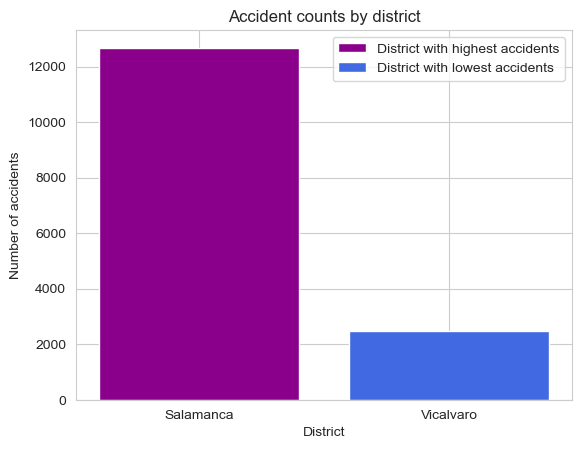

In [299]:
# Group by district and count the number of accidents
district_counts = df.groupby('distrito')['num_expediente'].count()

# Sort districts by the number of accidents in descending order
district_counts_sorted = district_counts.sort_values(ascending=False)

# Get the district with the highest number of accidents
highest_accident_district = district_counts_sorted.index[0]

# Get the district with the lowest number of accidents
lowest_accident_district = district_counts_sorted.index[-1]

# Get the number of accidents for the highest and lowest accident districts
highest_accident_count = district_counts_sorted.iloc[0]
lowest_accident_count = district_counts_sorted.iloc[-1]

# Create a bar chart for both districts
plt.bar(highest_accident_district, highest_accident_count, label='District with highest accidents')
plt.bar(lowest_accident_district, lowest_accident_count, label='District with lowest accidents')
plt.title('Accident counts by district')
plt.xlabel('District')
plt.ylabel('Number of accidents')
plt.legend()
plt.show()

Comparaison between the highest_accident_district and the lowest_accident_district

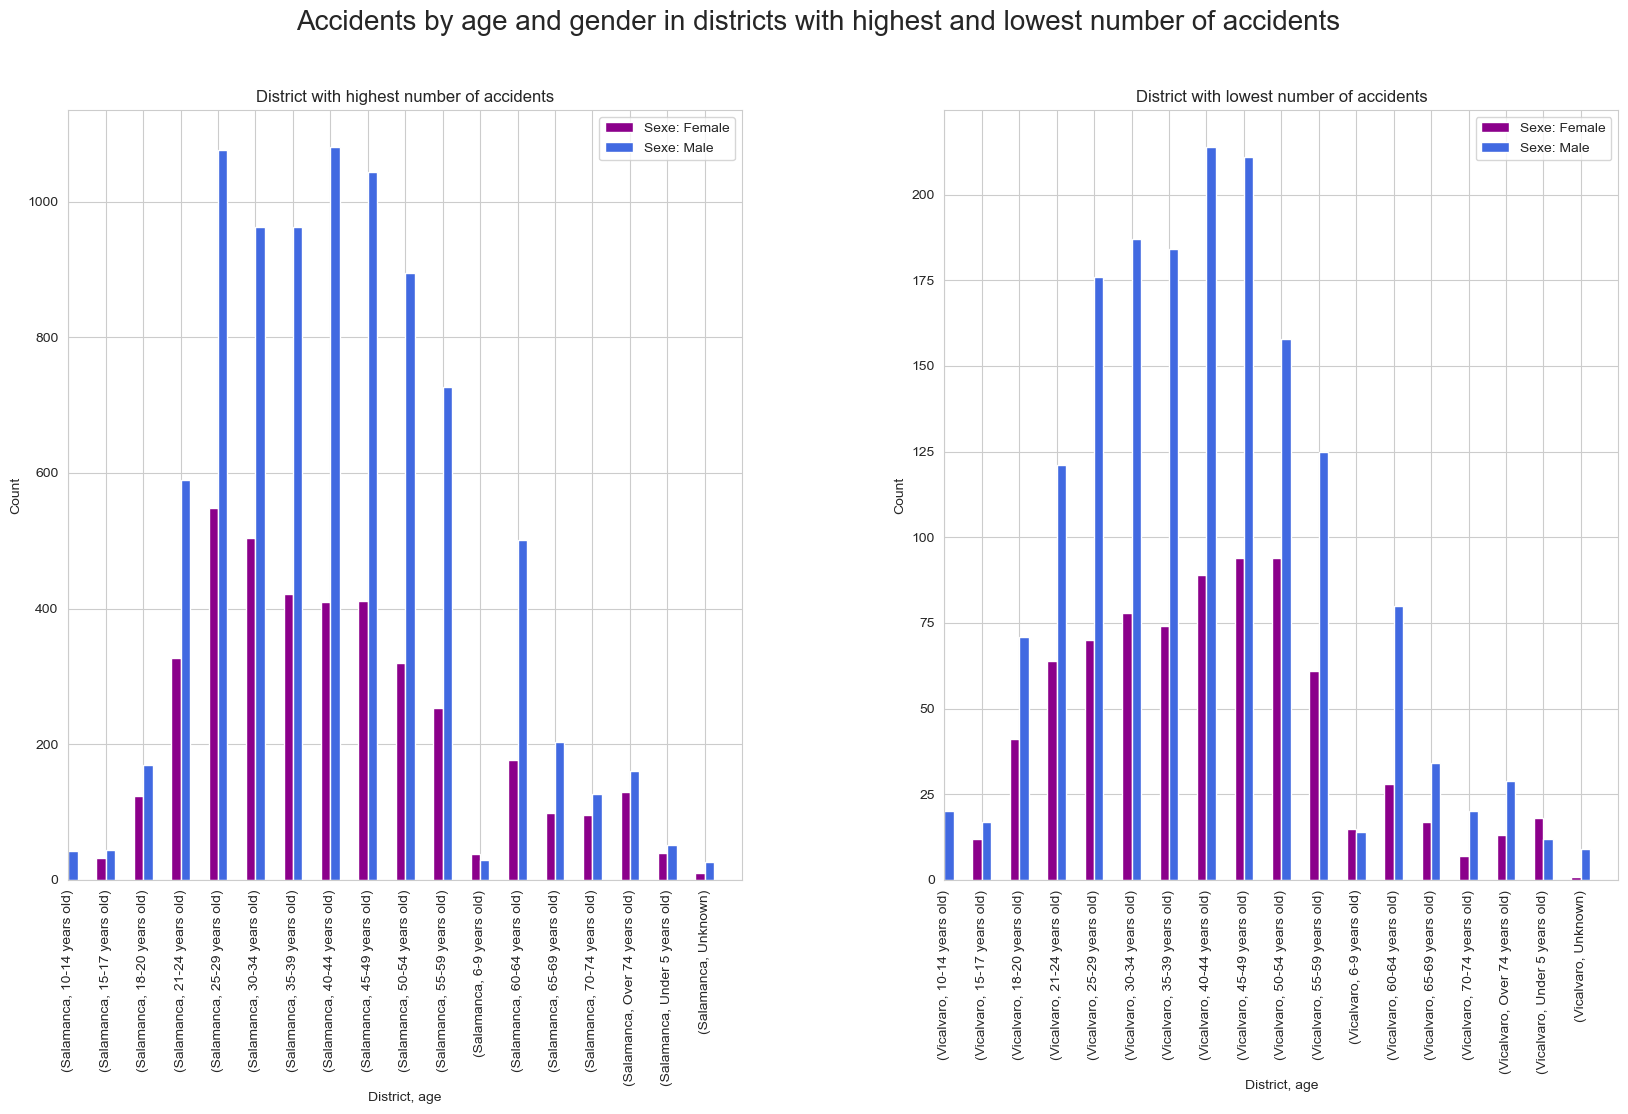

In [301]:
# Group by district, age, and gender, and count the number of accidents
district_age_gender_counts_highest = df[df['distrito'] == highest_accident_district].groupby(['distrito', 'rango_edad', 'sexo'])['num_expediente'].count()
district_age_gender_counts_lowest = df[df['distrito'] == lowest_accident_district].groupby(['distrito', 'rango_edad', 'sexo'])['num_expediente'].count()

# Create a bar chart for both districts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))  # increase the size of the plot
plt.subplots_adjust(wspace=0.3)

# Plot the highest accident district
district_age_gender_counts_highest.unstack().plot(kind='bar', ax=axes[0])
axes[0].set_title('District with highest number of accidents')
axes[0].set_ylabel('Count')  # Add y-label

# Rename the legend
labels = ['Sexe: ' + str(i) for i in axes[0].get_legend_handles_labels()[1]]
axes[0].legend(labels)

# Plot the lowest accident district
district_age_gender_counts_lowest.unstack().plot(kind='bar', ax=axes[1])
axes[1].set_title('District with lowest number of accidents')
axes[1].set_ylabel('Count')  # Add y-label

# Rename the legend
labels = ['Sexe: ' + str(i) for i in axes[1].get_legend_handles_labels()[1]]
axes[1].legend(labels)

# Set the x-axis range to be the same for both subplots
xlim = (0, len(district_age_gender_counts_highest.unstack()))
axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)
axes[0].set_xlabel('District, age')
axes[1].set_xlabel('District, age')

plt.suptitle('Accidents by age and gender in districts with highest and lowest number of accidents', fontsize=20)  # increase the font size of the title

# Save the plot
plt.savefig('accidents_by_age_gender.png', dpi=300, bbox_inches='tight')

plt.show()


In [245]:
# Apply unidecode to remove accents

# Load GeoJSON data
with open('madrid-districts_.geojson') as f:
    districts_geojson_data = json.load(f)
covid=result
covid['distrito'] = covid['distrito'].astype(str).str.title()
covid['distrito'] = covid['distrito'].apply(lambda x: unidecode(x.lower()))
covid['distrito'] = covid['distrito'].astype(str).str.title()


distrito_p = covid.groupby(covid['distrito'].str.title()).count()['num_expediente']
dis = list(distrito_p.items())
df = pd.DataFrame(dis, columns=['name', 'accidents'])

# Create a Folium map centered on Madrid
madrid_map = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=districts_geojson_data,
    name='choropleth',
    data=df,
    columns=['name', 'accidents'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Accidents',
    featureidkey='properties.name',
    highlight=True,
    overlay=True,
    


).add_to(madrid_map)
# Add a tooltip with the district names
for feature in districts_geojson_data['features']:
    name = feature['properties']['name']
    coords = feature['geometry']['coordinates'][0][0]
    center_lat = sum([c[1] for c in coords])/len(coords)
    center_lon = sum([c[0] for c in coords])/len(coords)
    num_accidents = df.loc[df['name'] == name, 'accidents']

    if not num_accidents.empty:
        tooltip_text = f"{name}: {num_accidents.iloc[0]} accidents"
    else:
        tooltip_text = f"{name}: 0 accidents"
    folium.Marker(
        location=[center_lat, center_lon],
        icon=folium.Icon(color="red"),
        tooltip=tooltip_text,
    ).add_to(madrid_map)
# Display the map
# Add layer control to toggle choropleth layer
folium.LayerControl().add_to(madrid_map)
madrid_map


### Contributions:
We all contributed equally However:
Alba was the main website designer,
Norma was the main writer,
Eliot was the main developper